In [27]:
#importing Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [28]:
#Loading Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [30]:
#creating model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [31]:
#training the model
model.fit(x_train, y_train, epochs=10)

model.save('handwritten.model')

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2595 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1065 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0737 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0413 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0267 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0217 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.016

INFO:tensorflow:Assets written to: handwritten.model\assets


In [32]:
model = tf.keras.models.load_model('handwritten.model')
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1221 - accuracy: 0.9729
0.1221245601773262
0.9728999733924866


1/1 [==============================] - 0s 26ms/step
This digit can be 2


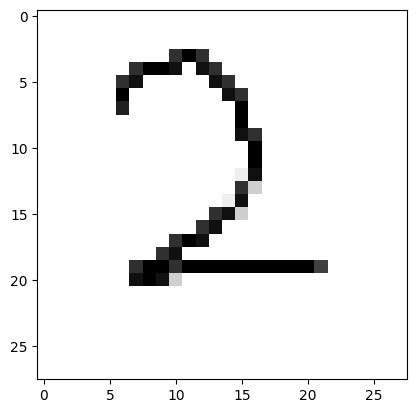

1/1 [==============================] - 0s 25ms/step
This digit can be 3


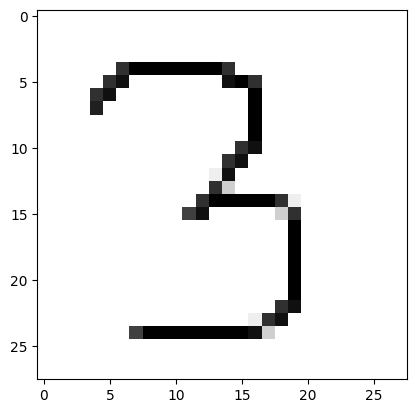

1/1 [==============================] - 0s 25ms/step
This digit can be 5


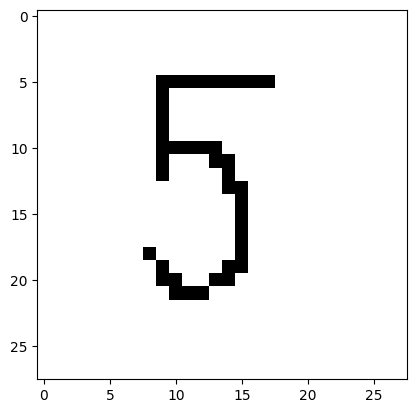

1/1 [==============================] - 0s 28ms/step
This digit can be 5


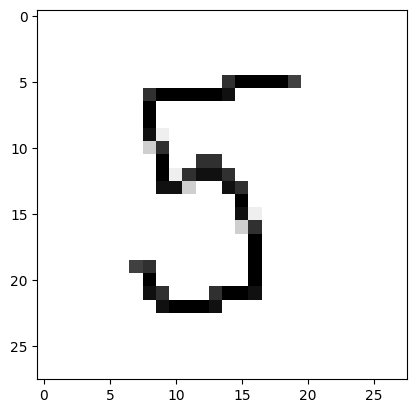

1/1 [==============================] - 0s 27ms/step
This digit can be 7


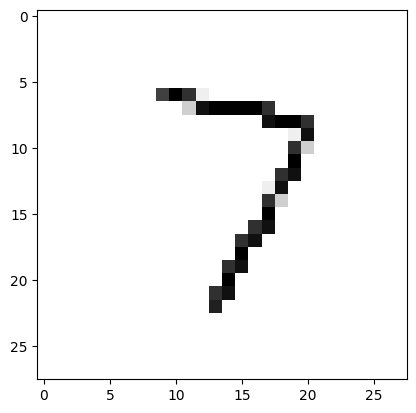

1/1 [==============================] - 0s 32ms/step
This digit can be 0


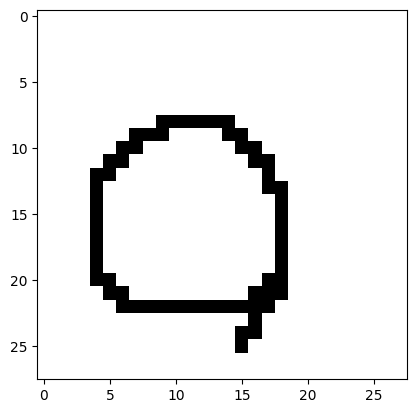

1/1 [==============================] - 0s 32ms/step
This digit can be 4


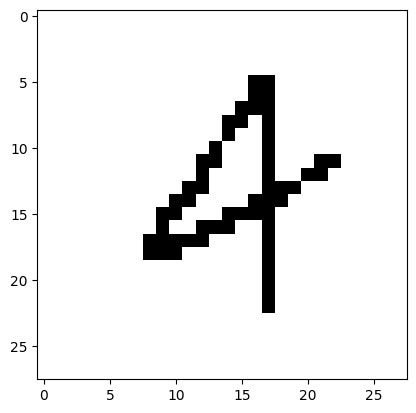

1/1 [==============================] - 0s 26ms/step
This digit can be 1


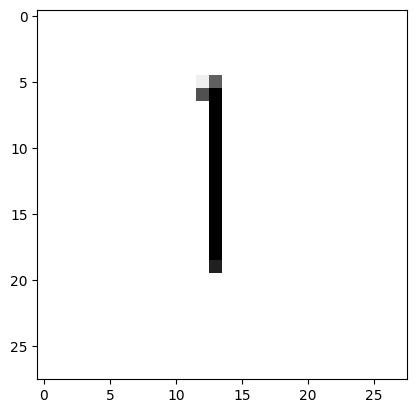

1/1 [==============================] - 0s 26ms/step
This digit can be 8


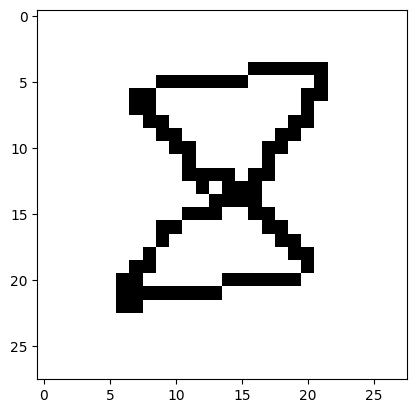

1/1 [==============================] - 0s 32ms/step
This digit can be 9


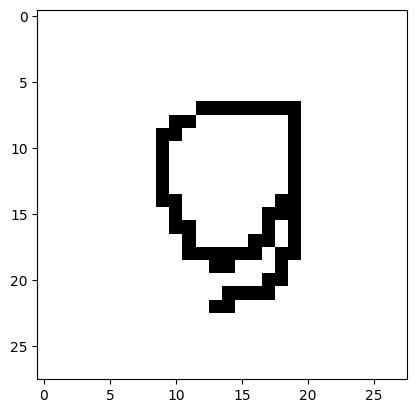

In [39]:
img_num = 1
while os.path.isfile(f"numbers/number{img_num}.png"):
    try:
        img = cv2.imread(f"numbers/number{img_num}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit can be {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error!")
    finally:
        img_num +=1